# Clustering and Decomposition

In [1]:
import pandas as pd
import numpy as np
import sklearn as sc
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from numpy.random import rand
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_pca(data_pca, cluster):
    fig, ax = plt.subplots()
    ax.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.3, c = cluster)
    ax.legend()
    ax.grid(True)
    plt.show()
    

def cluster_pca(data, k):
    pca = PCA(n_components=3)
    data_pca = pca.fit_transform(data)

    kmeans_model = KMeans(n_clusters=k, n_init=10, max_iter=300, tol=0.0001)
    kmeans_model.fit(data_pca)
    cluster = kmeans_model.predict(data_pca)
    
    return data_pca, cluster


def FindK (data, ks = range(6, 15)):
    pca = PCA(n_components=3)
    data_pca = pca.fit_transform(data)
    calinski_scores = [None] * len(ks)
    silhouette_scores = [None] * len(ks)
    for i in range(0, len(ks)):
        print "Testing k value:", ks[i]
        kmeans_model = KMeans(n_clusters=ks[i], n_init=10, max_iter=300, tol=0.0001)


        kmeans_model.fit(data_pca)
        cluster = kmeans_model.predict(data_pca)
        sample_idxs = np.random.randint(1, data_pca.shape[0], 10000)

        calinski_scores[i]  = metrics.calinski_harabaz_score(data_pca, cluster)
        silhouette_scores[i] = metrics.silhouette_score(data_pca[sample_idxs, :],
                                                        cluster[sample_idxs],
                                                        metric='euclidean')
    return ks, calinski_scores, silhouette_scores


def plot_k_score(ks, calinski_scores, silhouette_scores):
    f, (ax1, ax2) = plt.subplots(2, sharex=True)
    ax1.plot(ks, calinski_scores)
    ax2.plot(ks, silhouette_scores)
    plt.show()
    
    
def GetDataBySeason (season):
    data = pd.read_csv("../data/one_hot_items.csv")
    data = data[[s in season for s in data.season]]

    order_id = data.order_id.values
    data = data.drop(["order_id", "season", "city"], axis = 1)
    
    return order_id, data

# Cluster with no separation between seasons/cities

In [ ]:

data = pd.read_csv("../data/one_hot_items.csv")
order_id = data.order_id.values
data = data.drop(["order_id", "season", "city"], axis = 1)

data_pca, cluster = cluster_pca(data, 16)
plot_pca(data_pca, cluster)

res_table = pd.DataFrame({"order_id": order_id, "cluster": cluster})
res_table.to_csv("../data/item_clusters.csv", index = False)

# Cluster with separation between seasons (summer and winter)

Testing k value: 6
Testing k value: 7
Testing k value: 8
Testing k value: 9
Testing k value: 10
Testing k value: 11
Testing k value: 12
Testing k value: 13
Testing k value: 14


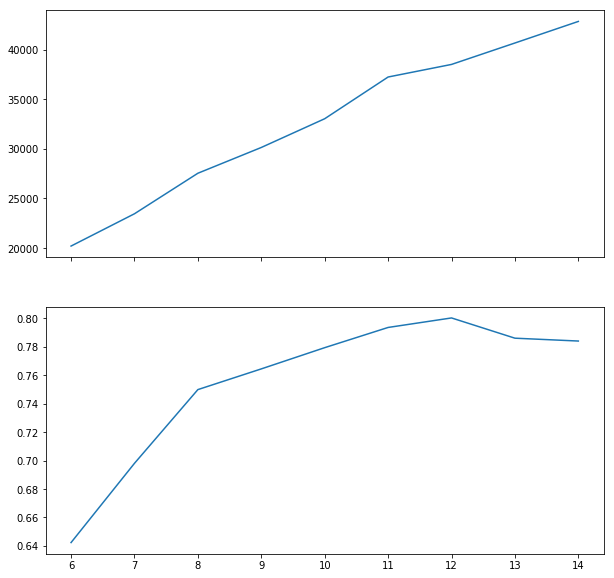

In [3]:
order_id_winter, data_winter = GetDataBySeason(["SON", "DJF"])
ks, calinski_scores, silhouette_scores = FindK(data_winter)
plot_k_score(ks, calinski_scores, silhouette_scores)

Testing k value: 6
Testing k value: 7
Testing k value: 8
Testing k value: 9
Testing k value: 10
Testing k value: 11
Testing k value: 12
Testing k value: 13
Testing k value: 14
Testing k value: 15
Testing k value: 16
Testing k value: 17
Testing k value: 18
Testing k value: 19


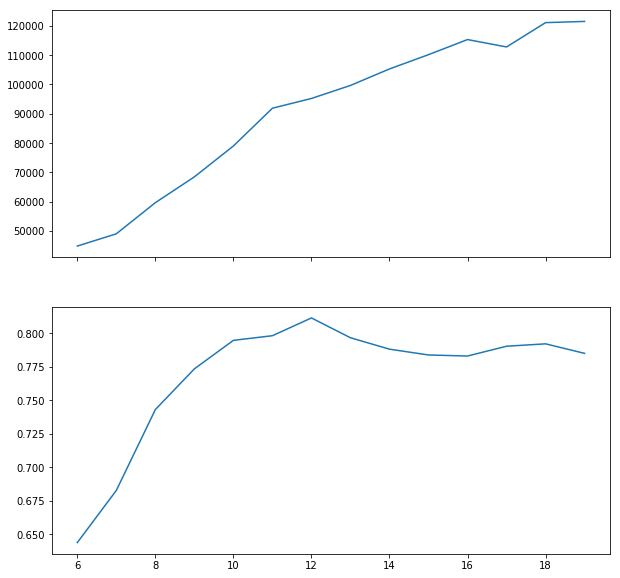

In [4]:
order_id_summer, data_summer = GetDataBySeason(["MAM", "JJA"])
ks, calinski_scores, silhouette_scores = FindK(data_summer, range(6, 20))
plot_k_score(ks, calinski_scores, silhouette_scores)

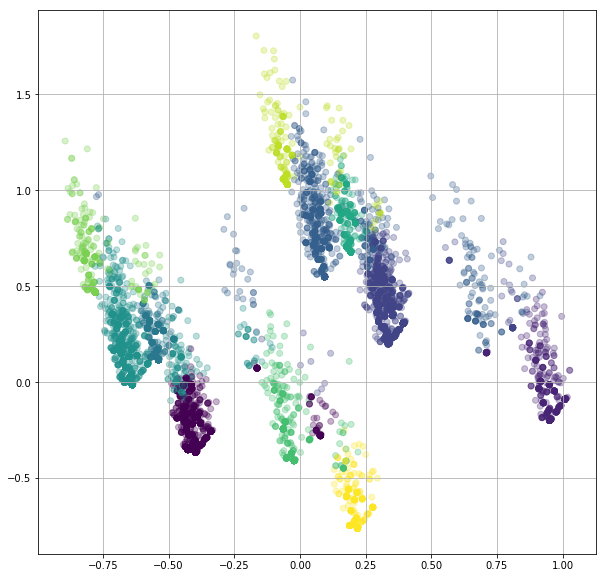

In [5]:
data_winter_pca, winter_cluster = cluster_pca(data_winter, 11)
plot_pca(data_winter_pca, winter_cluster)

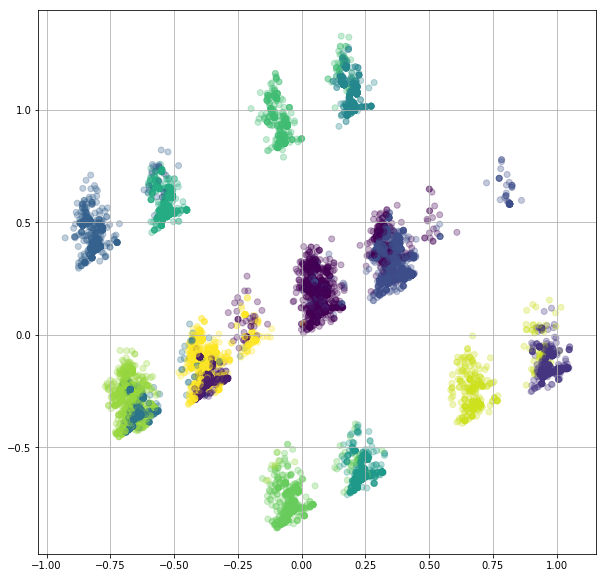

In [6]:
data_summer_pca, summer_cluster = cluster_pca(data_summer, 14)
plot_pca(data_summer_pca, summer_cluster)

In [7]:
summer_cluster = ["s_" + str(n) for n in summer_cluster] 
winter_cluster = ["w_" + str(n) for n in winter_cluster] 

res_table = pd.DataFrame({
    "order_id": np.concatenate((order_id_summer, order_id_winter)),
    "cluster": np.concatenate((summer_cluster, winter_cluster))
})
res_table.to_csv("../data/item_clusters_seasons.csv", index = False)